# 1. EFFECTIVENESS OF THE ONLINE LEARNING RULE

## Setup the environment

#### Adding the source code path

In [1]:
import sys  
sys.path.insert(1, './../../ESN-IP/IP/.')

In [2]:
import random

random.seed(10)

#### Import experiment data 

In [3]:
from DATA import NARMA10

data = NARMA10(True, [80,0,20])

X_TR, Y_TR = data.TR()
X_VAL, Y_VAL = data.VAL()
X_TS, Y_TS = data.TS()

## NOT PRETRAINED RESERVOIR

In [4]:
N_UNITS = 250

In [5]:
from IPReservoir import IPReservoir
from ESN import Reservoir
from IntrinsicPlasticity import IPMask

simple_reservoir = Reservoir(N = N_UNITS, sparsity=0.9, desired_rho=0.25, bias = True)

W_x = simple_reservoir.W_x
W_u = simple_reservoir.W_u
b_x = simple_reservoir.b_x
b_u = simple_reservoir.b_u

In [6]:
simple_reservoir.rho()

tensor(0.2500)

## PRETRANING WITH OLD STYLE INTRINSIC PLASTICITY

In [7]:
ip_reservoir = IPReservoir(N = N_UNITS, mask=IPMask.normalMask(N_UNITS), bias = True)

ip_reservoir.W_x = W_x
ip_reservoir.W_u = W_u
ip_reservoir.b_x = b_x
ip_reservoir.b_u = b_u

Check the prior data distribution.

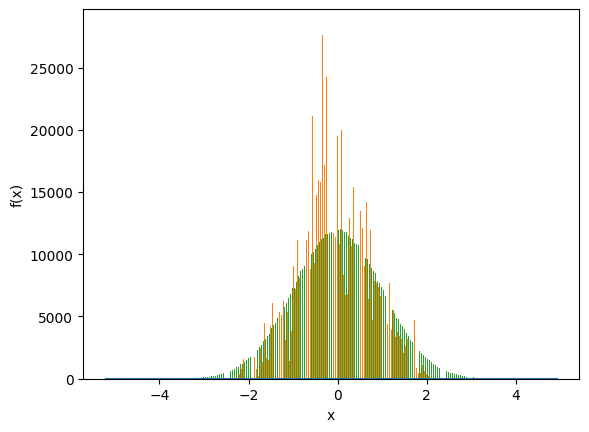

In [8]:
ip_reservoir.pre_train(X_TR, 0, 0)
ip_reservoir.predict(X_TR, save_gradients=False, save_states=True)
ip_reservoir.plot_global_neural_activity()

With a large number of units, low spectral radius and a high sparsity, reservoir is more or less already Gaussian.

In [9]:
ip_reservoir.pre_train(X_TR, eta=0.00005, epochs=15,  learning_rule="online", verbose=True) #16

No transient applied. Reservoir was already warmed up
- Epoch: 1) | KL Divergence value: 2450.341796875.
- Epoch: 2) | KL Divergence value: 2271.498046875.
- Epoch: 3) | KL Divergence value: 2126.172119140625.
- Epoch: 4) | KL Divergence value: 2009.4815673828125.
- Epoch: 5) | KL Divergence value: 1915.97900390625.
- Epoch: 6) | KL Divergence value: 1841.6334228515625.
- Epoch: 7) | KL Divergence value: 1783.3851318359375.
- Epoch: 8) | KL Divergence value: 1738.6148681640625.
- Epoch: 9) | KL Divergence value: 1705.2510986328125.
- Epoch: 10) | KL Divergence value: 1681.466796875.
- Epoch: 11) | KL Divergence value: 1665.5225830078125.
- Epoch: 12) | KL Divergence value: 1655.799560546875.
- Epoch: 13) | KL Divergence value: 1651.082275390625.
- Epoch: 14) | KL Divergence value: 1650.866943359375.
- Epoch: 15) | KL Divergence value: 1655.251220703125.


In [10]:
print(f"Spectral radius - initial: { ip_reservoir.rho(scaled = False)} - final: {ip_reservoir.rho()} ")

Spectral radius - initial: 0.2500002980232239 - final: 0.8280695676803589 


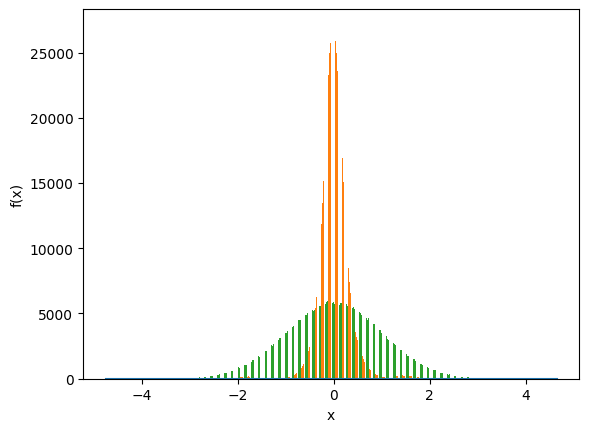

In [11]:
ip_reservoir.predict(X_TR, save_gradients=False, save_states=True)
ip_reservoir.sample_targets(X_TR.shape[0], overwrite=True)
ip_reservoir.plot_global_neural_activity()

In [12]:
ip_reservoir.print_IP_stats([0,1])

Unit - (1): [ ACTUAL_MEAN == (0.07442604750394821)  ACTUAL_STD == (0.18355940282344818)][ TARGET_MEAN == (-0.004000790882855654) TARGET_STD == (0.9946810007095337)]
Unit - (2): [ ACTUAL_MEAN == (-0.08884472399950027)  ACTUAL_STD == (0.3401376008987427)][ TARGET_MEAN == (0.012059074826538563) TARGET_STD == (0.9858149290084839)]
Overall network: [ACTUAL_MEAN == (0.009308219887316227)  ACTUAL_STD == (0.3149714171886444)]


In [13]:
ip_reservoir.rho()

tensor(0.8281)

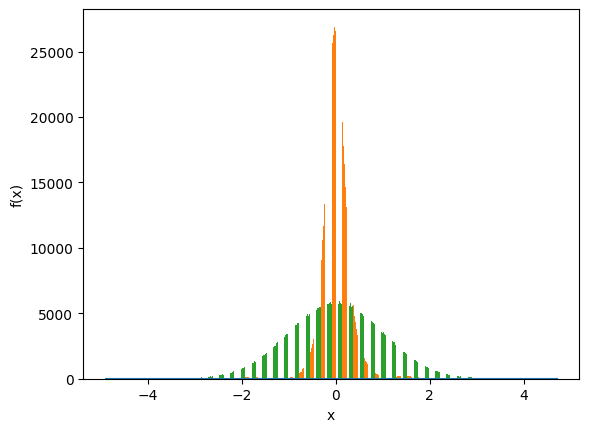

In [14]:
ip_reservoir.predict(X_TR, save_gradients=False, save_states=True)
ip_reservoir.sample_targets(X_TR.shape[0], overwrite=True)
ip_reservoir.plot_global_neural_activity()

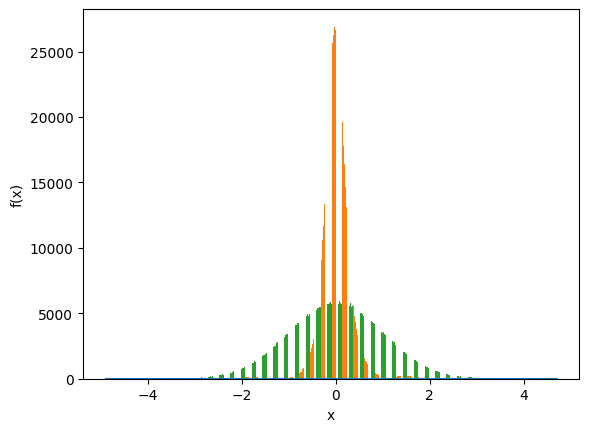

In [15]:
ip_reservoir.predict(X_TR, save_gradients=False, save_states=True)
ip_reservoir.plot_global_neural_activity()

## BIMODAL MIXTURE OF GAUSSIAN

In [16]:
# It seems that switching the "old" bias terms down (input bias and recurrent weights bias), 
# helps the algorithm converging earlier, letting the IP bias dominate the linear translation. 

bimodal_reservoir = IPReservoir(N = N_UNITS, mask=IPMask.mixedBimodalMask(N_UNITS), bias = False)

bimodal_reservoir.W_x = W_x
bimodal_reservoir.W_u = W_u
#bimodal_reservoir.b_x = b_x
#bimodal_reservoir.b_u = b_u

In [17]:
bimodal_reservoir.pre_train(X_TR, eta= 0.0000025, epochs=20,  learning_rule="online", verbose=True)

- Epoch: 1) | KL Divergence value: 3496.07373046875.
- Epoch: 2) | KL Divergence value: 3228.046875.
- Epoch: 3) | KL Divergence value: 2982.76611328125.
- Epoch: 4) | KL Divergence value: 2761.84228515625.
- Epoch: 5) | KL Divergence value: 2565.67822265625.
- Epoch: 6) | KL Divergence value: 2393.65625.
- Epoch: 7) | KL Divergence value: 2244.37353515625.
- Epoch: 8) | KL Divergence value: 2115.9130859375.
- Epoch: 9) | KL Divergence value: 2006.0689697265625.
- Epoch: 10) | KL Divergence value: 1912.54248046875.
- Epoch: 11) | KL Divergence value: 1833.0799560546875.
- Epoch: 12) | KL Divergence value: 1765.5887451171875.
- Epoch: 13) | KL Divergence value: 1708.1715087890625.
- Epoch: 14) | KL Divergence value: 1659.18017578125.
- Epoch: 15) | KL Divergence value: 1617.2255859375.
- Epoch: 16) | KL Divergence value: 1581.1446533203125.
- Epoch: 17) | KL Divergence value: 1549.981201171875.
- Epoch: 18) | KL Divergence value: 1522.9603271484375.


In [ ]:
print(f"Spectral radius - initial: { bimodal_reservoir.rho(scaled = False)} - final: {bimodal_reservoir.rho()} ")

Spectral radius - initial: 0.25000011920928955 - final: 0.5530200004577637 


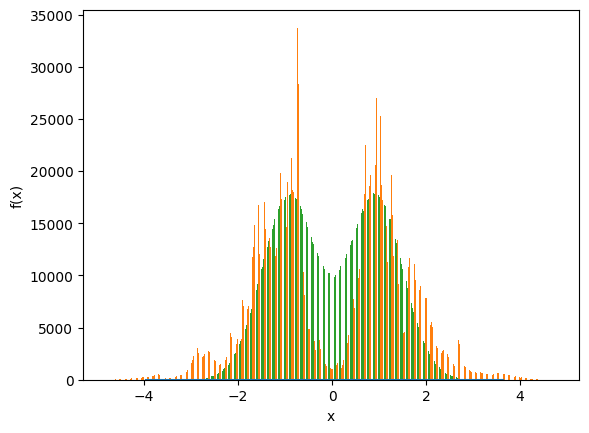

In [ ]:
bimodal_reservoir.predict(X_TR, save_gradients=False, save_states=True)
bimodal_reservoir.plot_global_neural_activity()

In [ ]:
print(f"Spectral radius - initial: { bimodal_reservoir.rho(scaled = False)} - final: {bimodal_reservoir.rho()} ")

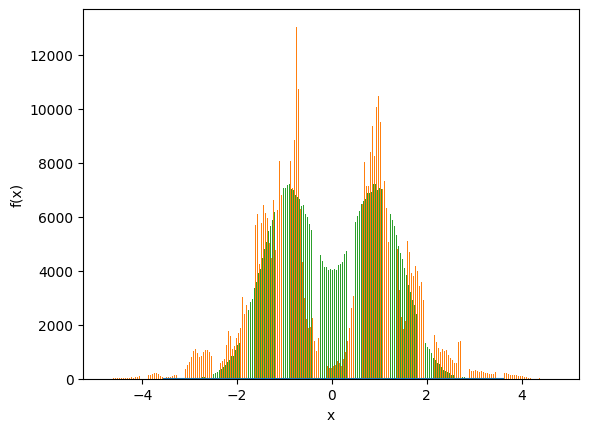

In [ ]:
bimodal_reservoir.predict(X_TS, save_gradients=False, save_states=True)
bimodal_reservoir.sample_targets(X_TS.shape[0], overwrite=True)
bimodal_reservoir.plot_global_neural_activity()

In [ ]:
bimodal_reservoir.print_IP_stats([0,1,4,7,8,9])

Unit - (1): [ ACTUAL_MEAN == (-0.18120518326759338)  ACTUAL_STD == (0.09550703316926956)][ TARGET_MEAN == (-0.9122743010520935) TARGET_STD == (0.5694736838340759)]
Unit - (2): [ ACTUAL_MEAN == (1.2702339887619019)  ACTUAL_STD == (0.02948167361319065)][ TARGET_MEAN == (0.9194967150688171) TARGET_STD == (0.5895587205886841)]
Unit - (5): [ ACTUAL_MEAN == (-2.6304383277893066)  ACTUAL_STD == (0.20846398174762726)][ TARGET_MEAN == (-0.898727297782898) TARGET_STD == (0.5662872791290283)]
Unit - (8): [ ACTUAL_MEAN == (0.7451815605163574)  ACTUAL_STD == (0.05441315844655037)][ TARGET_MEAN == (0.9296598434448242) TARGET_STD == (0.5738697052001953)]
Unit - (9): [ ACTUAL_MEAN == (-0.8335329294204712)  ACTUAL_STD == (0.035076119005680084)][ TARGET_MEAN == (-0.9337209463119507) TARGET_STD == (0.570824384689331)]
Unit - (10): [ ACTUAL_MEAN == (0.47569411993026733)  ACTUAL_STD == (0.1250647008419037)][ TARGET_MEAN == (0.9205551147460938) TARGET_STD == (0.5961416363716125)]
Overall network: [ACTUAL_ME

## EVAUALTUION IN ESN

In [ ]:
from ESN import EchoStateNetwork

simple_reservoir.rescale_weights(0.96)
simple_reservoir.rho()

simple_esn = EchoStateNetwork(simple_reservoir)
ip_esn = EchoStateNetwork(ip_reservoir)
bimodal_esn = EchoStateNetwork(bimodal_reservoir)

simple_esn.train(X_TR, Y_TR, 0)
ip_esn.train(X_TR, Y_TR, 0)
bimodal_esn.train(X_TR, Y_TR, 0)


Reservoir warmed up with the first 100 time steps
Reservoir warmed up with the first 100 time steps


C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=5.21691e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Reservoir warmed up with the first 100 time steps


array([0.21875, 0.28125, 0.1875 , ..., 0.3125 , 0.28125, 0.28125],
      dtype=float32)

### COMPARISON ON TEST DATA

In [ ]:
from Metrics import MSE

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.022076175466465023


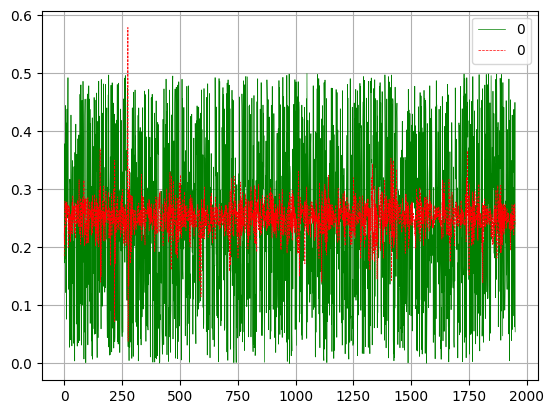

In [ ]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { simple_esn.evaluate(X_TS, Y_TS, metric=MSE(), plot=True)}" )

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.022091212764278317


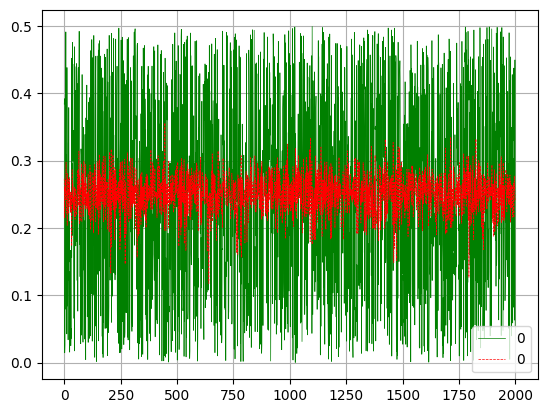

In [ ]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { ip_esn.evaluate(X_TS, Y_TS, metric=MSE(), plot=True)}" )

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.025154339177048877


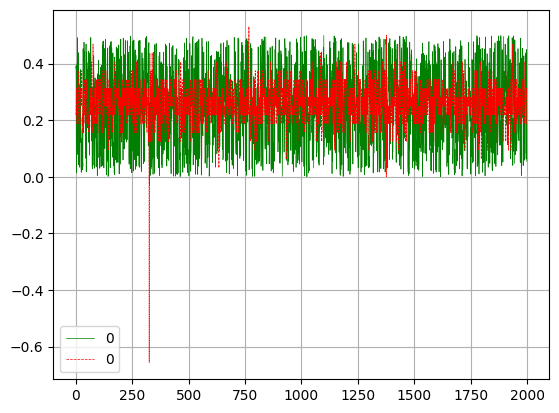

In [ ]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { bimodal_esn.evaluate(X_TS, Y_TS, metric=MSE(), plot=True)}" )

In [ ]:
print(f"Spectral radius - initial: { bimodal_esn.reservoir.rho(scaled = False)} - final: {bimodal_esn.reservoir.rho()} ")

Spectral radius - initial: 0.25000011920928955 - final: 0.5530200004577637 


## Lyapunov Exponnet

In [ ]:
simple_esn.reservoir.LCE(X_TS)

-0.5967346

In [ ]:
ip_esn.reservoir.LCE(X_TS)

-0.12459435

In [ ]:
bimodal_esn.reservoir.LCE(X_TS)

-0.6339055

## MEMORY CAPACITY

In [ ]:
def mean_mc(esn: EchoStateNetwork, rep):
    mc = 0
    for _ in range(rep):
        mc += esn.MemoryCapacity()

    return mc/rep

In [ ]:
mean_mc(simple_esn, 5)

C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.34314e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.34114e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.34638e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\casa_\AppData\Lo

tensor(11.4729)

In [ ]:
mean_mc(ip_esn, 5)

tensor(8.2828)

In [ ]:
mean_mc(bimodal_esn, 5)

## DEVIATION FROM LINEARITY

In [ ]:
simple_esn.reservoir.de_fi()

0.07558928391055252

In [ ]:
ip_esn.reservoir.de_fi()

0.33866286875413953

In [ ]:
bimodal_esn.reservoir.de_fi()

0.11271658036228423